In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Import the data
# put 'r' before the path string to address any special characters in the path, such as '\'
office = pd.read_csv(r'C:\Users\MMS\Downloads\the_office_series.csv')

# first take some information from the data 
office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
EpisodeNumber    188 non-null int64
Season           188 non-null int64
EpisodeTitle     188 non-null object
About            188 non-null object
Ratings          188 non-null float64
Votes            188 non-null int64
Viewership       188 non-null float64
Duration         188 non-null int64
Date             188 non-null object
GuestStars       29 non-null object
Director         188 non-null object
Writers          188 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 17.7+ KB


### lets analyze the viewership based on the episodes

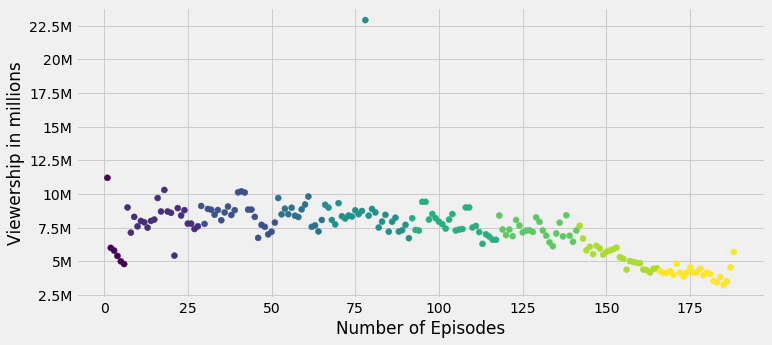

,Season,EpisodeTitle,Ratings,Votes,Viewership
77,5,Stress Relief,9.7,8170,22.91


In [22]:
# define the plotting area
plt.figure(figsize=(11, 5))

# make the scatrer plot
plt.scatter('EpisodeNumber','Viewership', data = office, c = 'Season')

# labelling of figure
plt.xlabel('Number of Episodes')
plt.ylabel('Viewership in millions')
plt.yticks([2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5],
           ['2.5M', '5M', '7.5M', '10M' , '12.5M' , '15M' , '17.5M' , '20M' , '22.5M'])

# show the figure
plt.show()

# Pick the row have maximum viewership to see the exact figure of Viewship and other details
max_viewership = office[office['Viewership'] == max(office['Viewership'])]
max_viewership[['Season', 'EpisodeTitle', 'Ratings', 'Votes', 'Viewership']]

### find the top 15 voted episodes

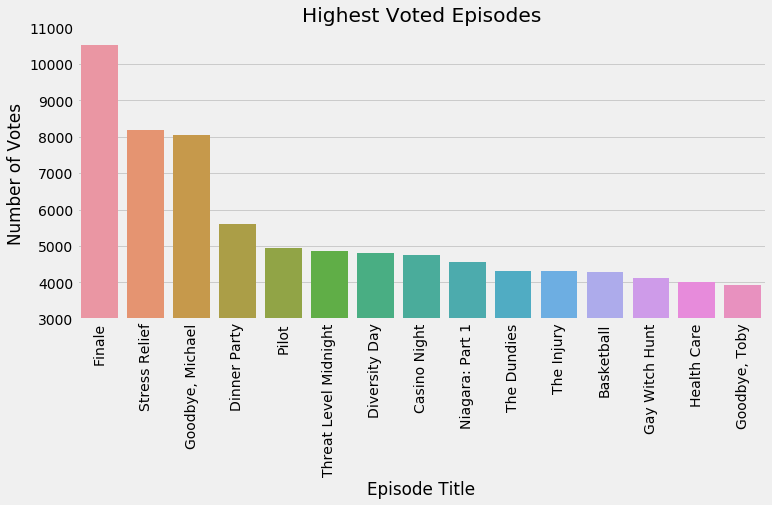

,Season,EpisodeTitle,Ratings,Votes,Viewership
187,9,Finale,9.8,10515,5.69


In [23]:
# define the top 15 votes taken by episode
top_15_voted = (office.sort_values(by = ['Votes','Ratings'],ascending=False)).iloc[:15,:]

# define the plotting area
plt.figure(figsize=(11, 5))

# make the bar plot
plot = sns.barplot('EpisodeTitle', 'Votes', data = top_15_voted)

# adjust the axes
plot.set(ylim=(3000, 11000))
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)

# labelling of figure
plt.xlabel("Episode Title")
plt.ylabel("Number of Votes")
plt.title("Highest Voted Episodes")

# show the figure
plt.show()

# Pick the row have maximum votes to see the exact figure of Votes and other details
max_votes = office[office['Votes'] == max(office['Votes'])]
max_votes[['Season', 'EpisodeTitle', 'Ratings', 'Votes', 'Viewership']]

In [14]:
office.set_index(keys=['Season'], drop=False,inplace=True)

# get a list of names
names= office['Season'].unique().tolist()

# now we can perform a lookup on a 'view' of the dataframe
seasons = []

for x in range(1,10):
   seasons.append(office.loc[office.Season == x])

print(seasons[0:2])

[        EpisodeNumber  Season   EpisodeTitle  \
Season                                         
1                   1       1          Pilot   
1                   2       1  Diversity Day   
1                   3       1    Health Care   
1                   4       1   The Alliance   
1                   5       1     Basketball   
1                   6       1       Hot Girl   

                                                    About  Ratings  Votes  \
Season                                                                      
1       The premiere episode introduces the boss and s...      7.5   4936   
1       Michael's off color remark puts a sensitivity ...      8.3   4801   
1       Michael leaves Dwight in charge of picking the...      7.8   4024   
1       Just for a laugh, Jim agrees to an alliance wi...      8.1   3915   
1       Michael and his staff challenge the warehouse ...      8.4   4294   
1       Michael is just one of the many male staff who...      7.7   3854  

In [24]:
avg_list = []

# We create a function avg_rating that takes in the season number and gives the average rating of that season

def avg_rating (season):
    return (seasons[season]["Ratings"].mean())
for x in range(0,9):
    avg_list.append(avg_rating(x))
    
print(avg_list)

[7.966666666666668, 8.440909090909091, 8.58695652173913, 8.564285714285713, 8.488461538461538, 8.196153846153846, 8.308333333333334, 7.604166666666667, 7.913043478260869]


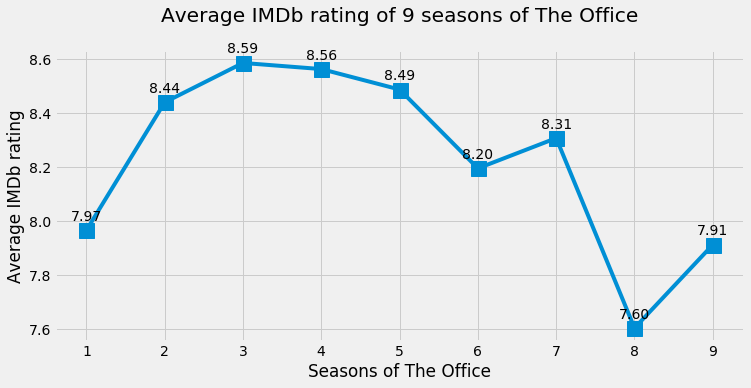

In [25]:
# lets plot the finding:
plt.figure(figsize=(11, 5))

# first define the labelling
x = office["Season"].unique()
plt.style.use("fivethirtyeight")
plt.plot(x, avg_list, marker = "s", markersize=15)
plt.xlabel("Seasons of The Office")
plt.ylabel("Average IMDb rating")
plt.title("Average IMDb rating of 9 seasons of The Office\n ")

# Now apply the number to the ratings by using plt.annotate()
for x,y in zip(x,avg_list):
    
    label = "{:.2f}".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords ="offset points", # how to position the text
                 xytext = (0,10), # distance from text to points (x,y)
                 ha = 'center')
plt.show()

### Now let us see which episodes ranked the highest and why ?

In [26]:
# The highest rating
highest_rating = max(office["Ratings"])

# Filter the Dataframe row that has the highest rated episode
highest_rated_dataframe = office.loc[office["Ratings"] == highest_rating]
highest_rated_dataframe

,EpisodeNumber,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
137,138,7,"Goodbye, Michael",As the office gets ready for Michael's final d...,9.8,8059,8.42,50,28 April 2011,NaN,Paul Feig,Greg Daniels
187,188,9,Finale,"One year later, Dunder Mifflin employees past ...",9.8,10515,5.69,51,16 May 2013,"Joan Cusack, Ed Begley Jr, Rachel Harris, Nanc...",Ken Kwapis,Greg Daniels


### find the rating of top 10 directors

In [27]:
directors = office["Director"].value_counts().keys()

# lets analyze their ratings by finding average rating
directors_rating = office.groupby('Director')['Ratings'].mean().reset_index()

# Now pick the top ten rated directors and plot their ratings
top_10_directors = directors_rating.sort_values('Ratings', ascending = False).head(10)
top_10_directors

,Director,Ratings
20,Harold Ramis,8.825000
22,Jason Reitman,8.800000
50,Steve Carell,8.766667
40,Paul Feig,8.753333
29,Joss Whedon,8.700000
18,Gene Stupnitsky,8.700000
52,Tucker Gates,8.650000
32,Ken Kwapis,8.607692
30,Julian Farino,8.600000
34,Lee Eisenberg,8.600000


Text(0.5, 1.0, "Directors and their episodes' ratings")

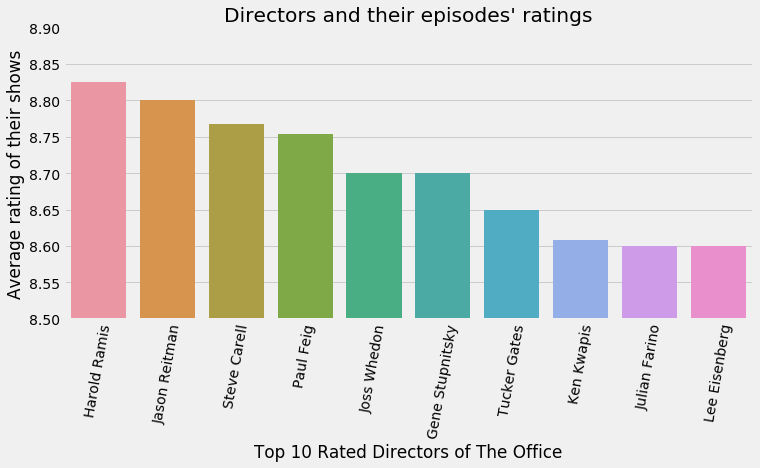

In [28]:
# lets plot the rting of top 10 directors
plt.figure(figsize=(11, 5))

# make a bar plot 
plot = sns.barplot('Director', 'Ratings', data = top_10_directors)

# adjust the axes 
plot.set(ylim=(8.5,8.9))
plot.set_xticklabels(plot.get_xticklabels(), rotation=80)

# labelling of the plot
plt.xlabel("Top 10 Rated Directors of The Office")
plt.ylabel("Average rating of their shows")
plt.title("Directors and their episodes' ratings")